# ML210-Assignment 6: Resampling Methods

Dataset needed:
UCI Airfoil Self-Noise Data Set  (https://archive.ics.uci.edu/ml/datasets/diabetes)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('diabetes.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Make an 80/20 train/test split.

In [2]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].values  
y = data.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Fit a logistic regression model on the training data.

In [3]:
from sklearn.linear_model import LogisticRegression
# solver='liblinear'
# solver='lbfgs
model = LogisticRegression(solver='liblinear', max_iter=200)
fitting = model.fit(X_train, y_train)
score = fitting.score(X_test, y_test)
print(score)
#TODO

0.7402597402597403


#### Predict the test data.

In [4]:
#y_pred = #TODO
from sklearn.metrics import  accuracy_score

y_pred = model.predict(X_test)
confidence_score = model.decision_function(X_test)
print(confidence_score)
lr_acc = accuracy_score(y_test, y_pred)

print(lr_acc)

[-2.49669711  1.68231983  0.98309259 -0.26048527 -1.06442879 -1.9735712
  0.92533842 -1.93658824 -1.56509915 -0.03990257 -0.97992995  1.2725815
  0.50423553 -1.46762469 -2.06728911  0.88311167 -1.79543396  1.91257638
 -1.45239733 -1.50522596 -0.79196294 -1.73900599  0.22683181  0.88648246
 -1.67972039 -1.69499953  0.17023308 -0.56869756  1.25807201 -1.39437997
  0.48260058  0.43488126 -0.4418502  -1.09266153  0.90128599 -2.05330183
  0.13965601  0.46879739 -1.06286509  1.98830363 -1.67390105 -0.87373078
 -0.44516697 -1.37814763 -0.38460125 -0.26194061 -1.99450531 -2.83992735
 -1.60943349  0.17387682 -0.38775833 -1.02801194 -1.56320079 -2.24126265
  1.27139964 -0.81962537 -1.92998594  0.48625113  2.34786748 -0.56121166
 -2.00049306 -0.53859846 -0.07359232  1.67579678  0.57593362  1.52302289
 -2.97413555 -0.67566397 -0.12794234 -1.64036235 -1.86213054  1.33811532
 -2.14973272 -0.57433243 -1.1844152  -0.41685001 -1.83225658 -2.52879519
 -3.43831616 -0.26499398 -1.48636404 -1.53094991 -1.7

#### Plot the ROC curve and compute the AUC score

Accuracy: 0.7402597402597403
AUC: 0.6925302948091879


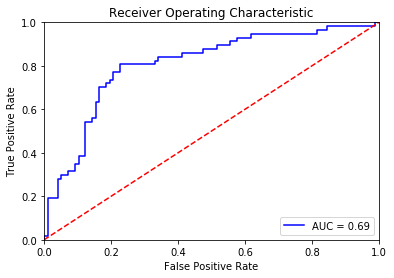

Confusion matrix:
 [[85 12]
 [28 29]]


In [5]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))


# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

#### Calculate the accuracy metric of the observations in the test set.

In [6]:
#TODO
from sklearn.metrics import mean_squared_error
import numpy as np

mean_sq_error =  mean_squared_error(y_test, y_pred)
print(mean_sq_error)


0.2597402597402597


## Cross-Validation

## *k-*Fold Cross-Validation

In few sentences, explain how K-fold procedure work.

Perform linear regression using *k-*fold cross validation, try different values of k and print out the mean accuracy obtained.

# Cross Validation:

No need of a validation subset 

Randomly partition the dataset into k equal
size subsamples (“folds”). Each time use one fold for evaluation and use the other folds for training


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

k_fold = [3, 5, 10, 15, 20, 25, 30]
for k in k_fold:
    cv = ShuffleSplit(n_splits=k, test_size=0.2, random_state=0)
    scores_Shuffle = cross_val_score(model, X, y, cv=cv)
    scores_Simple = cross_val_score(model, X, y, cv=k)
    score_print= [scores_Shuffle.mean(), scores_Simple.mean()]
    print('{} {}'.format(*score_print))

0.7943722943722945 0.7695899813394877
0.787012987012987 0.768270944741533
0.7805194805194804 0.7669685577580314
0.7757575757575758 0.772201106083459
0.7775974025974025 0.7658232118758435
0.7771428571428572 0.7659354838709678
0.7744588744588746 0.7674615384615383


## The Bootstrap

Print the target class distribution (You can see that there's almost twice as much 0s than 1s)


In [8]:
from collections import defaultdict
dic = defaultdict(int)
for val in y:
    dic[val] += 1

for key, val in dic.items():
    print('there is {} {} in the target class'.format(val, key))


there is 268 1 in the target class
there is 500 0 in the target class


Let's perform bootstrapping to up-sample the minority class

1. First, we'll import the resampling module from Scikit-Learn
2. Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class
3. Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [9]:
from sklearn.utils import resample
# Separate majority and minority classes
majority_class = data[data['Outcome'] == 0]
minority_class = data[data['Outcome'] == 1]
#minority_class.head()

nb_sample = len(majority_class) - len(minority_class)
print('{} minority samples need to be generated'.format(nb_sample))



# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(majority_class), random_state=42)   # reproducible results

print('initial size of the minority class {} final size after upsampling {}'.format(len(minority_class),len(minority_upsampled)))



 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])

majority_class = data_upsampled[data_upsampled['Outcome'] == 0]
minority_class = data_upsampled[data_upsampled['Outcome'] == 1]

print(len(majority_class) == len(minority_class))
print("The dataset is now balanced")


# Display new class counts 
#TODO: the new DataFrame should now have more observations than the original, and the ratio of the two classes is now 1:1

232 minority samples need to be generated
initial size of the minority class 268 final size after upsampling 500
True
The dataset is now balanced


Let's train another model using Logistic Regression, this time on the balanced dataset

0.68
0.68
Accuracy: 0.68
AUC: 0.6782852564102564


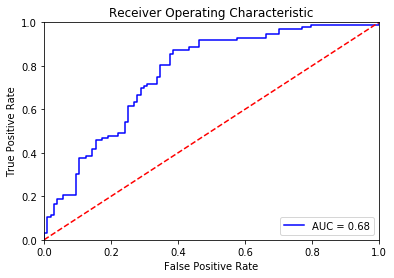

Confusion matrix:
 [[75 29]
 [35 61]]
0.32


In [10]:

# How's our accuracy? Has it improved? Comment
#TODO

from sklearn.model_selection import train_test_split

X = data_upsampled.iloc[:, :-1].values  
y = data_upsampled.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(solver='liblinear', max_iter=200)
fitting = model.fit(X_train, y_train)
score = fitting.score(X_test, y_test)
print(score)

y_pred = model.predict(X_test)
confidence_score = model.decision_function(X_test)

lr_acc = accuracy_score(y_test, y_pred)

print(lr_acc)

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))


# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

mean_sq_error =  mean_squared_error(y_test, y_pred)
print(mean_sq_error)

# Conclusion

The model is a bit more precise after bootstrating 
compare to reality (and to the titanic project) this dataset was of excellent quality. 
